# Import the packages and modules

In [1]:
from gym_vrp.envs import SantaIRPEnv
from agents.ff_sdp_agent import SDPAgentFF

import pandas as p
import matplotlib.pyplot as plt
import torch


## Train the agent

In [2]:
batch_size = 128
seed = 123
num_nodes = 7

num_epochs = 2001
lr=1E-3
gamma = 0.99
dropout_rate = 0.5
hidden_dim=1024


# Instantiate the SantaIRPEnv environment
env_santa = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)

# Instantiate the TSPAgentFF (assuming it's compatible with SantaIRPEnv)
agent_santa_ff = SDPAgentFF(node_dim=num_nodes,hidden_dim=hidden_dim,lr=lr,gamma=gamma,dropout_rate=dropout_rate,
    seed=seed, csv_path=f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv",
)


agent_santa_ff.train(
    env_santa,
    episodes=num_epochs,
    check_point_dir=f"./check_points/santa_ff_{num_nodes}_{seed}/",
)

Epoch 00204: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00405: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00606: reducing learning rate of group 0 to 1.0000e-06.


## Visualise the actions of the agent in the environments

In [3]:
# num_epochs = 2001

In [4]:
# Setup for evaluation
# env_santa = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)
env_santa.enable_video_capturing(
    video_save_path=f"./videos/video_test_santa_ff_{num_nodes}_{seed}_{num_epochs - 1}.mp4"
)

In [5]:
# load the best agent from training
agent_santa_ff.model.load_state_dict(torch.load(f"./check_points/santa_ff_{num_nodes}_{seed}/model_epoch_{num_epochs-1}.pt"))

<All keys matched successfully>

In [6]:
# Evaluate the agent
rewards = agent_santa_ff.evaluate(env_santa)

<Figure size 640x480 with 0 Axes>

In [7]:
# Close the video recorder
env_santa.vid.close()

Moviepy - Building video ./videos/video_test_santa_ff_7_123_2000.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_7_123_2000.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_7_123_2000.mp4


## Learning Plots

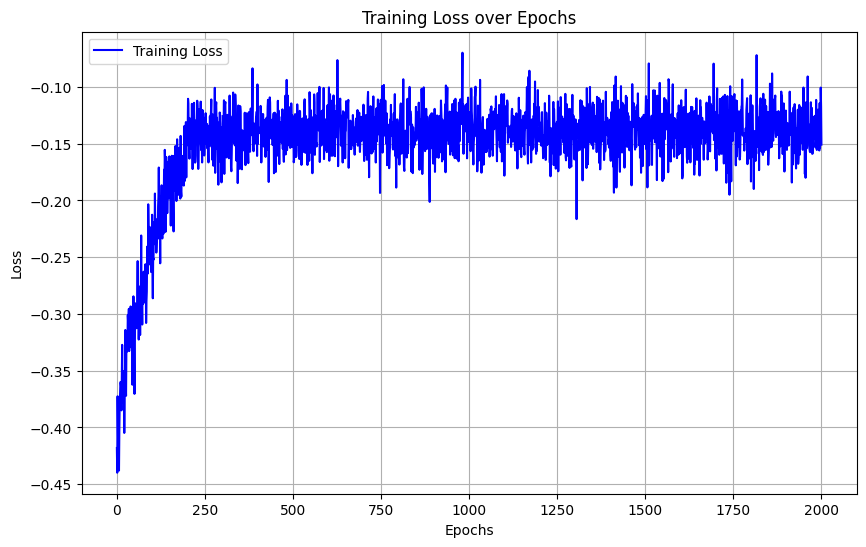

In [8]:
import pandas as pd

# Load the CSV file
csv_path = f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv"
data = pd.read_csv(csv_path)

# Extract the 'Epoch' and 'Loss' columns
epochs = data['Epoch']
loss = data['Loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# Performance

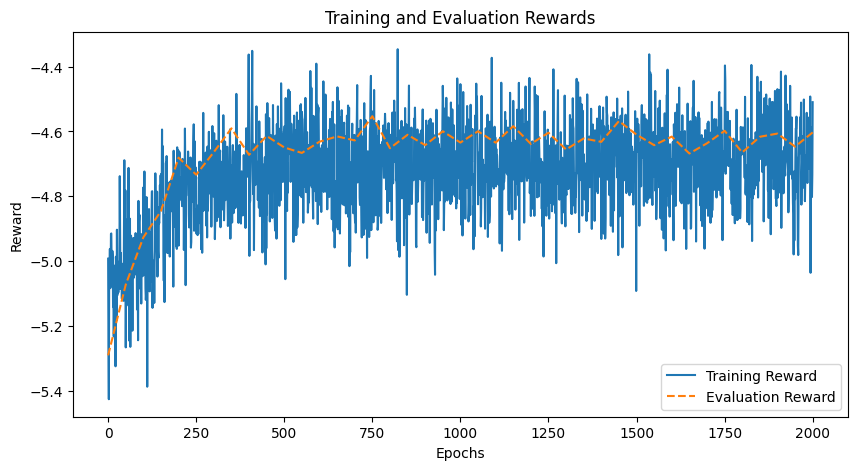

In [9]:
training_rewards = data['Train Reward']
eval_rewards = data['Eval Reward'].dropna()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(training_rewards, label='Training Reward')
plt.plot(eval_rewards, label='Evaluation Reward', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards')
plt.legend()
plt.show()